In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls -lh /gpfs/fs1/scratch/cchen/


total 2.0K
drwxr-xr-x 2 cchen ncar 4.0K May  2 09:34 offline/
drwxr-xr-x 2 cchen ncar 4.0K May  2 13:18 offline_v2/


In [4]:
ls -ltr /glade/scratch/cchen/TAU_run4/run/*.nc

lrwxrwxrwx 1 cchen ncar       152 Apr 29 11:46 /glade/scratch/cchen/TAU_run4/run/b.e20.BHIST.f09_g17.20thC.297_01_v2.cam.i.2000-01-01-00000.nc -> /glade/p/cesmdata/cseg/inputdata/cesm2_init/b.e20.BHIST.f09_g17.20thC.297_01_v2/2000-01-01/b.e20.BHIST.f09_g17.20thC.297_01_v2.cam.i.2000-01-01-00000.nc
lrwxrwxrwx 1 cchen ncar       155 Apr 29 11:46 /glade/scratch/cchen/TAU_run4/run/b.e20.BHIST.f09_g17.20thC.297_01_v2.mosart.r.2000-01-01-00000.nc -> /glade/p/cesmdata/cseg/inputdata/cesm2_init/b.e20.BHIST.f09_g17.20thC.297_01_v2/2000-01-01/b.e20.BHIST.f09_g17.20thC.297_01_v2.mosart.r.2000-01-01-00000.nc
lrwxrwxrwx 1 cchen ncar       152 Apr 29 11:46 /glade/scratch/cchen/TAU_run4/run/b.e20.BHIST.f09_g17.20thC.297_01_v2.cam.r.2000-01-01-00000.nc -> /glade/p/cesmdata/cseg/inputdata/cesm2_init/b.e20.BHIST.f09_g17.20thC.297_01_v2/2000-01-01/b.e20.BHIST.f09_g17.20thC.297_01_v2.cam.r.2000-01-01-00000.nc
lrwxrwxrwx 1 cchen ncar       153 Apr 29 11:46 /glade/scratch/cchen/TAU_run4/run/b.e20.BHIST.f09_

In [32]:
#ds = xr.open_dataset("/gpfs/fs1/scratch/cchen/archive/TAU_run4/atm/hist/offline_v2/TAU_run4.cam.h1.0001-01-01-00000.nc", decode_times=False)

In [9]:
ds = xr.open_dataset("/glade/scratch/dgagne/TAU_run4_hist/TAU_run4.cam.h1.0001-03-20-10800.nc")

/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [3]:
ds["NC_TAU_in"].max()

<xarray.DataArray 'NC_TAU_in' ()>
array(8.804735e+08, dtype=float32)

In [5]:
ds2 = xr.open_dataset("/gpfs/fs1/scratch/cchen/archive/TAU_run2/atm/hist/TAU_run2.cam.h1.0001-06-03-64800.nc", decode_times=False)

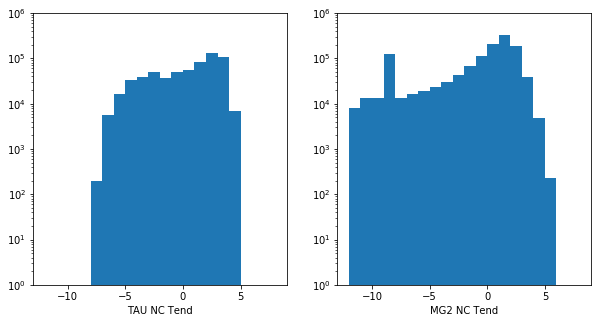

In [10]:
plt.figure(figsize=(10, 5))
bins = np.arange(-12, 9)
plt.subplot(1, 2, 1)
nc_vals_tau = ds["nctend_TAU"].values.ravel()
plt.hist(np.log10(-nc_vals_tau[-nc_vals_tau > 0]), bins=bins)
plt.xlabel("TAU NC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
nc_vals_mg = ds["nctend_MG2"].values.ravel()
plt.hist(np.log10(-nc_vals_mg[nc_vals_mg < 0]), bins=bins)
plt.xlabel("MG2 NC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_nc_hist.png", dpi=200, bbox_inches="tight")

(array([[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ..., 1.050000e+02,
         2.510000e+02, 2.070200e+04],
        [         nan,          nan,          nan, ..., 1.290000e+02,
         3.640000e+02, 4.261900e+04],
        [         nan,          nan,          nan, ..., 3.490000e+02,
         1.195000e+03, 8.740681e+06]]),
 array([-110045.766 , -108945.305 , -107844.85  , -106744.39  ,
        -105643.94  , -104543.48  , -103443.02  , -102342.56  ,
        -101242.1   , -100141.65  ,  -99041.19  ,  -97940.734 ,
         -96840.27  ,  -95739.81  ,  -94639.36  ,  -93538.9   ,
         -92438.445 ,  -91337.984 ,  -90237.53  ,  -89137.07  ,
         -88036.6

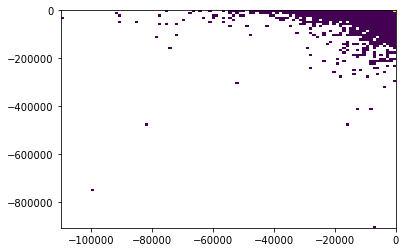

In [11]:
plt.hist2d(nc_vals_tau, nc_vals_mg, bins=100, cmin=1)

In [25]:
print("TAU NC==0:", np.count_nonzero(nc_vals_tau == 0))
print("MG  NC==0:", np.count_nonzero(nc_vals_mg == 0))

TAU NC==0: 18779998
MG  NC==0: 18097612


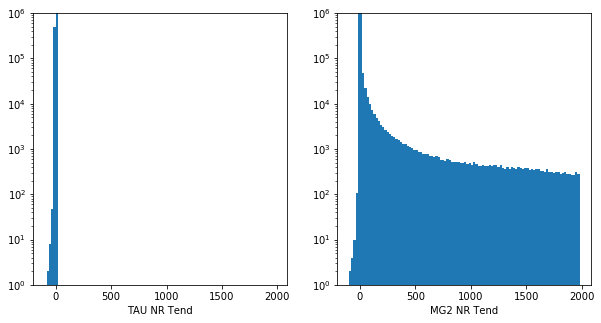

In [12]:
plt.figure(figsize=(10, 5))
bins = np.arange(-100, 2000, 20)
plt.subplot(1, 2, 1)
nr_vals_tau = ds["nrtend_TAU"].values.ravel()
plt.hist(nr_vals_tau, bins=bins)
plt.xlabel("TAU NR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
nr_vals_mg = ds["nrtend_MG2"].values.ravel()
plt.hist(nr_vals_mg, bins=bins)
plt.xlabel("MG2 NR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_nr_hist.png", dpi=200, bbox_inches="tight")

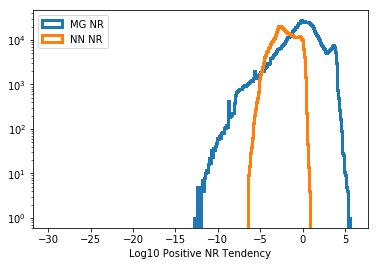

In [13]:
plt.hist(np.log10(nr_vals_mg[nr_vals_mg > 0]), bins=np.arange(-30, 6, 0.1), histtype="step", lw=3, label="MG NR")
plt.hist(np.log10(nr_vals_tau[nr_vals_tau > 0]), bins=np.arange(-30, 6, 0.1), histtype="step", lw=3, label="NN NR")
plt.gca().set_yscale("log")
plt.xlabel("Log10 Positive NR Tendency")
plt.legend(loc=2)
plt.savefig("mg_nn_nr_pos_hist.png", dpi=200, bbox_inches="tight")

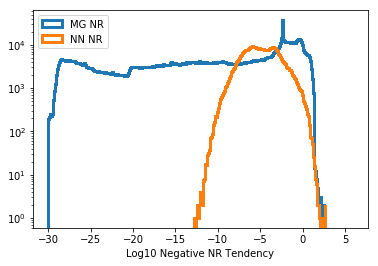

In [14]:
plt.hist(np.log10(-nr_vals_mg[nr_vals_mg < 0]), bins=np.arange(-30, 6, 0.1), histtype="step", lw=3, label="MG NR")
plt.hist(np.log10(-nr_vals_tau[nr_vals_tau < 0]), bins=np.arange(-30, 6, 0.1), histtype="step", lw=3, label="NN NR")
plt.gca().set_yscale("log")
plt.xlabel("Log10 Negative NR Tendency")
plt.legend(loc=2)
plt.savefig("mg_nn_nr_neg_hist.png", dpi=200, bbox_inches="tight")

In [19]:
nr_vals_mg.min()

-8372.226

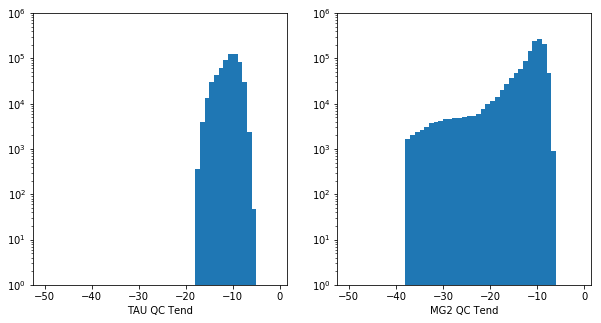

In [15]:
plt.figure(figsize=(10, 5))
bins = np.arange(-50, 0)
plt.subplot(1, 2, 1)
qc_vals_tau = ds["qctend_TAU"].values.ravel()
plt.hist(np.log10(-qc_vals_tau[-qc_vals_tau > 0]), bins=bins)
plt.xlabel("TAU QC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
qc_vals_mg = ds["qctend_MG2"].values.ravel()
plt.hist(np.log10(-qc_vals_mg[qc_vals_mg < 0]), bins=bins)
plt.xlabel("MG2 QC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_qc_hist.png", dpi=200, bbox_inches="tight")

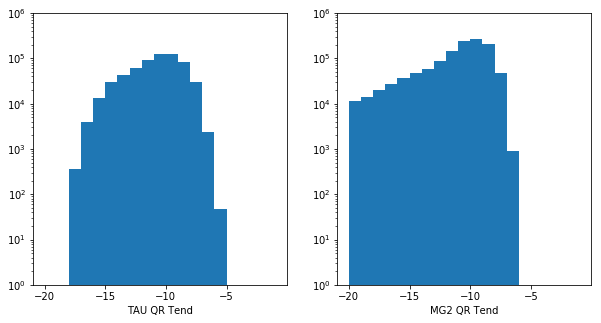

In [16]:
plt.figure(figsize=(10, 5))
bins = np.arange(-20, 0)
plt.subplot(1, 2, 1)
qc_vals_tau = ds["qrtend_TAU"].values.ravel()
plt.hist(np.log10(qc_vals_tau[qc_vals_tau > 0]), bins=bins)
plt.xlabel("TAU QR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
qc_vals_mg = ds["qrtend_MG2"].values.ravel()
plt.hist(np.log10(qc_vals_mg[qc_vals_mg > 0]), bins=bins)
plt.xlabel("MG2 QR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_qr_hist.png", dpi=200, bbox_inches="tight")

In [37]:
ds["QC_TAU_in"].min()

<xarray.DataArray 'QC_TAU_in' ()>
array(0., dtype=float32)

In [24]:
ds2

<xarray.Dataset>
Dimensions:       (ilev: 33, lat: 192, lev: 32, lon: 288, nbnd: 2, time: 30)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 ...
  * lon           (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 35.92 43.19 51.68 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 29.73 39.27 47.11 ...
  * time          (time) object 0001-01-01 00:00:00 0001-01-06 03:00:00 ...
Dimensions without coordinates: nbnd
Data variables:
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    time_bnds     (time, nbnd) float64 ...
    date_written  (time) |S8 ...
    time_written  (time) |S8 ...
    ndbase        int32 ...
    nsbase        int32 ...
    nb

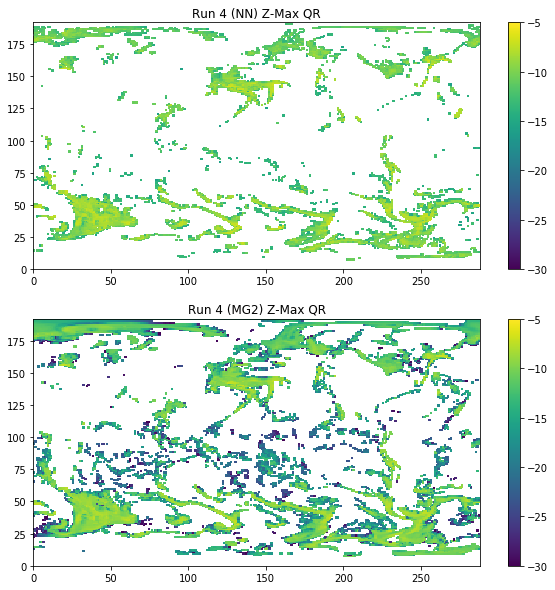

In [42]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(np.maximum(ds["qrtend_TAU"].values[0][-2], 1e-30)), mask=ds["qrtend_TAU"].values[0][-2]< 1e-30), vmin=-30, vmax=-5)
plt.title("Run 4 (NN) Z-Max QR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(np.maximum(ds["qrtend_MG2"].values[0][-2], 1e-30)), mask=ds["qrtend_MG2"].values[0][-2]< 1e-30), vmin=-30, vmax=-5)
plt.title("Run 4 (MG2) Z-Max QR")
plt.colorbar()
plt.savefig("run4_qr_map.png", dpi=200, bbox_inches="tight")

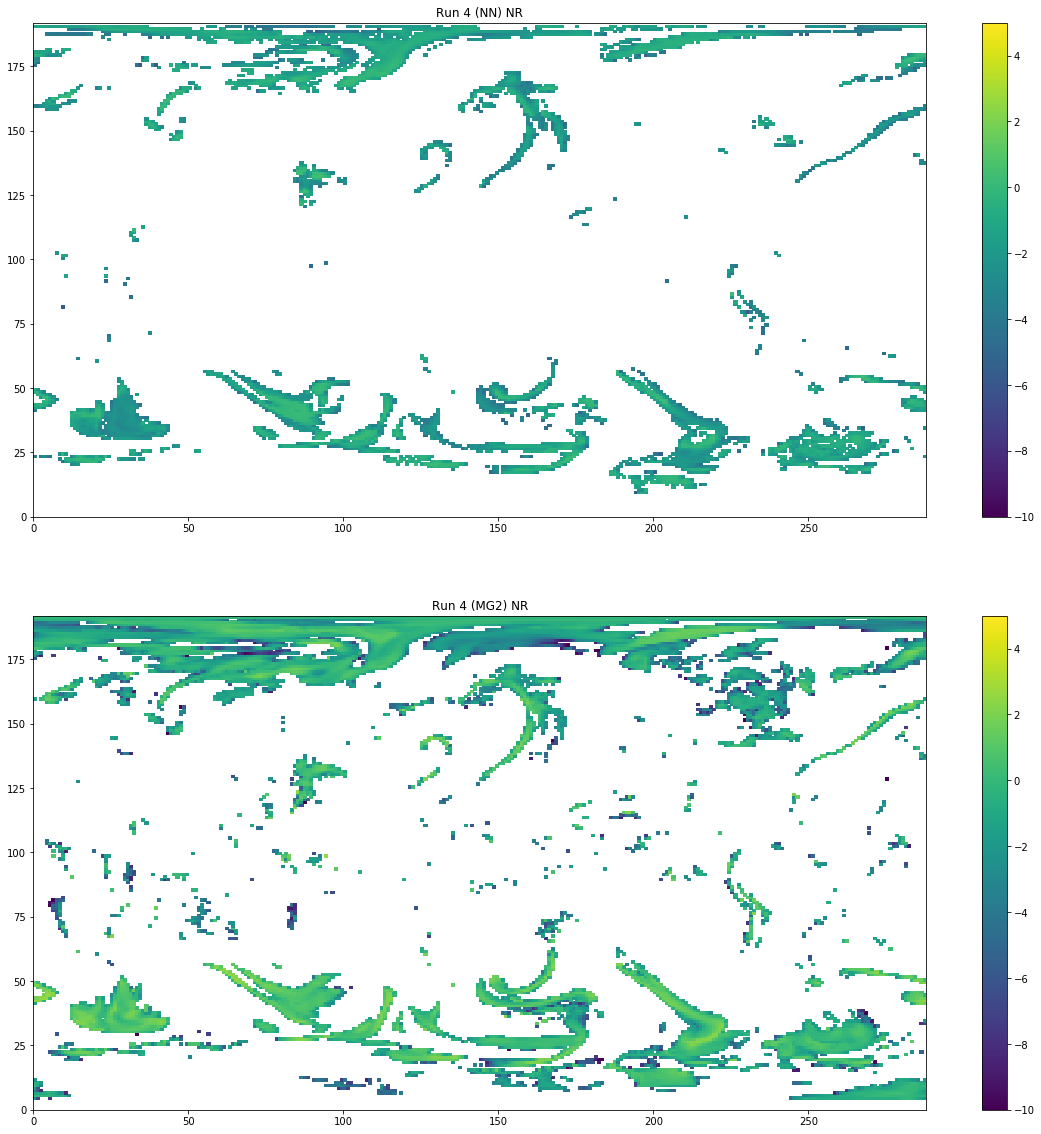

In [17]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(np.maximum(ds["nrtend_TAU"].values[0][-2], 1e-20)), mask=ds["nrtend_TAU"].values[0][-2]< 1e-20), vmin=-10, vmax=5)
plt.title("Run 4 (NN) NR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(np.maximum(ds["nrtend_MG2"].values[0][-2], 1e-20)), mask=ds["nrtend_MG2"].values[0][-2]< 1e-20), vmin=-10, vmax=5)
plt.title("Run 4 (MG2) NR")
plt.colorbar()
plt.savefig("run4_nr_map.png", dpi=200, bbox_inches="tight")

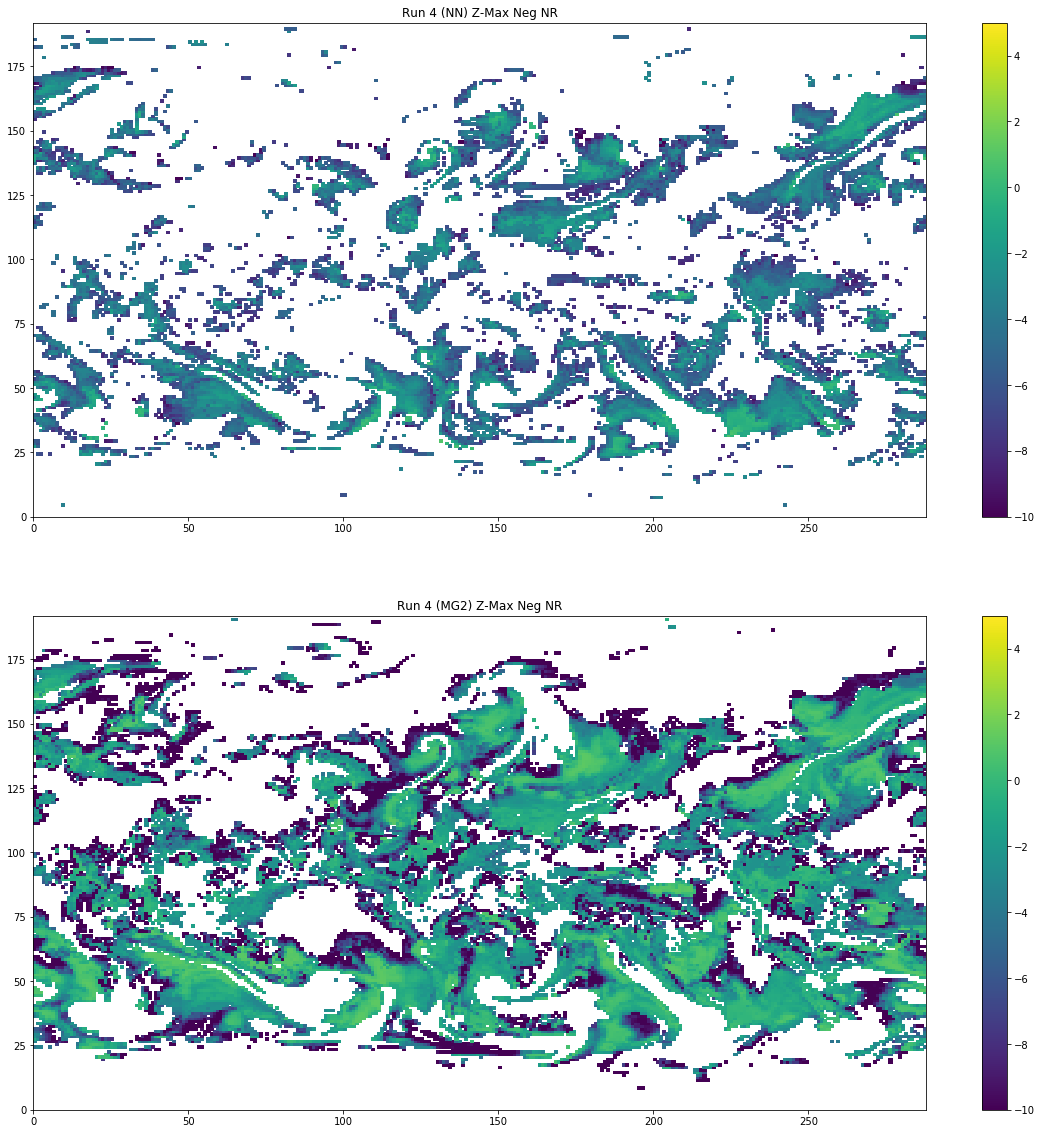

In [18]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(np.maximum(-ds["nrtend_TAU"].values[0][-3], 1e-20)), mask=-ds["nrtend_TAU"].values[0][-3]< 1e-20), vmin=-10, vmax=5)
plt.title("Run 4 (NN) Z-Max Neg NR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(np.maximum(-ds["nrtend_MG2"].values[0][-3], 1e-20)), mask=-ds["nrtend_MG2"].values[0][-3]< 1e-20), vmin=-10, vmax=5)
plt.title("Run 4 (MG2) Z-Max Neg NR")
plt.colorbar()
plt.savefig("run4_nr_neg_map.png", dpi=200, bbox_inches="tight")

In [45]:
np.log10(ds["QR_TAU_in"].values[0].max(axis=0)).max()

/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-0.36029273

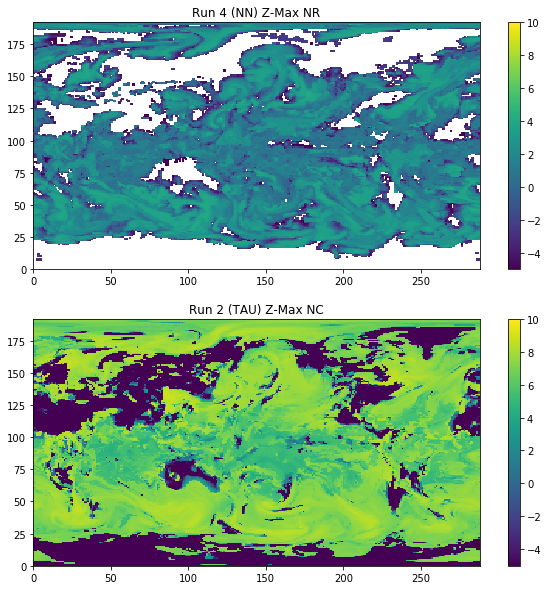

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds["NR_TAU_in"].values[0].max(axis=0)), mask=ds["QR_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-5, vmax=10)
plt.title("Run 4 (NN) Z-Max NR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds["NC_TAU_in"].values[0].max(axis=0)), mask=ds["NC_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-5, vmax=10)
plt.title("Run 2 (TAU) Z-Max NC")
plt.colorbar()
plt.savefig("run4_run2_nr_map.png", dpi=200, bbox_inches="tight")

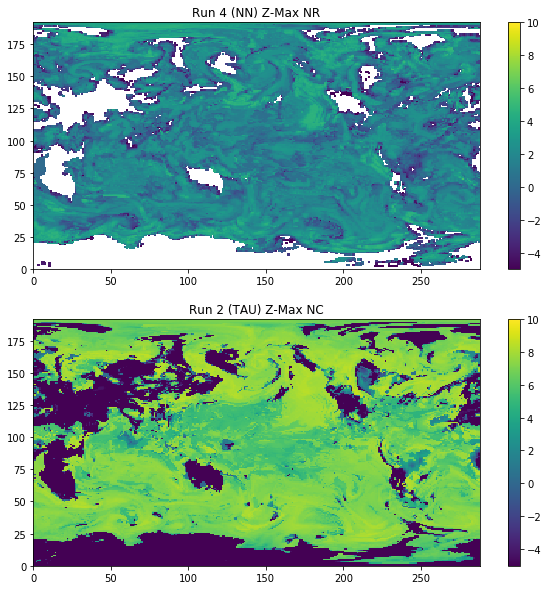

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds2["NR_TAU_in"].values[0].max(axis=0)), mask=ds2["QR_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-5, vmax=10)
plt.title("Run 4 (NN) Z-Max NR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds2["NC_TAU_in"].values[0].max(axis=0)), mask=ds2["NC_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-5, vmax=10)
plt.title("Run 2 (TAU) Z-Max NC")
plt.colorbar()
plt.savefig("run4_run2_nr_map.png", dpi=200, bbox_inches="tight")

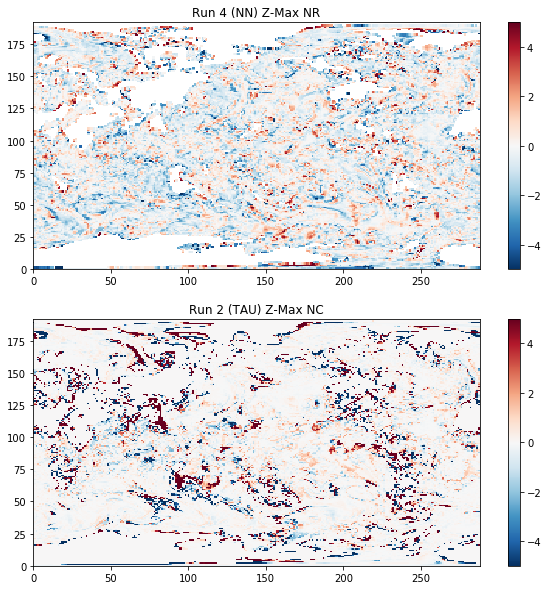

In [53]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds["NR_TAU_in"].values[0].max(axis=0)), mask=ds["QR_TAU_in"].values[0].max(axis=0)< 1e-15) 
               - np.ma.array(np.log10(ds2["NR_TAU_in"].values[1].max(axis=0)), mask=ds2["QR_TAU_in"].values[1].max(axis=0)< 1e-15), vmin=-5, vmax=5, cmap="RdBu_r")
plt.title("Run 4 (NN) Z-Max NR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds["NC_TAU_in"].values[0].max(axis=0)), mask=ds["NC_TAU_in"].values[0].max(axis=0)< 1e-15)-
               np.ma.array(np.log10(ds2["NC_TAU_in"].values[1].max(axis=0)), mask=ds2["NC_TAU_in"].values[1].max(axis=0)< 1e-15), vmin=-5, vmax=5, cmap="RdBu_r")
plt.title("Run 2 (TAU) Z-Max NC")
plt.colorbar()
plt.savefig("run4_run2_nr_diff_map.png", dpi=200, bbox_inches="tight")

/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


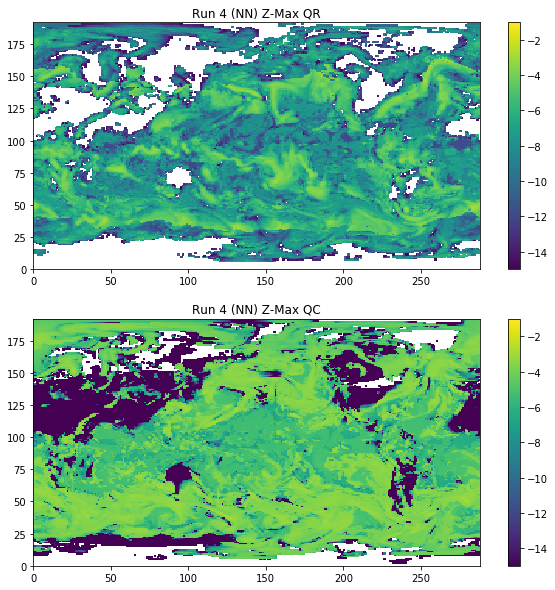

In [48]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds["QR_TAU_in"].values[0].max(axis=0)), mask=ds["QR_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-15, vmax=-1)
plt.title("Run 4 (NN) Z-Max QR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds["QC_TAU_in"].values[0].max(axis=0)), mask=ds["NC_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-15, vmax=-1)
plt.title("Run 4 (NN) Z-Max QC")
plt.colorbar()
plt.savefig("run4_run2_nr_map.png", dpi=200, bbox_inches="tight")

/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


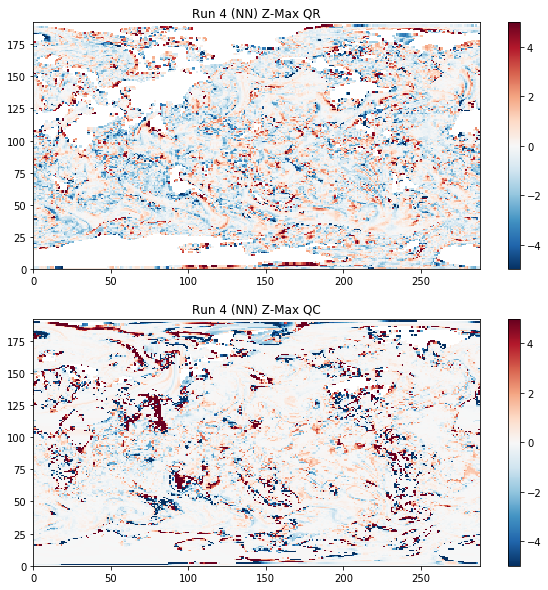

In [52]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds["QR_TAU_in"].values[0].max(axis=0)), mask=ds["QR_TAU_in"].values[0].max(axis=0)< 1e-15) 
               - np.ma.array(np.log10(ds2["QR_TAU_in"].values[1].max(axis=0)), mask=ds2["QR_TAU_in"].values[1].max(axis=0)< 1e-15), vmin=-5, vmax=5, cmap="RdBu_r")
plt.title("Run 4 (NN) Z-Max QR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds["QC_TAU_in"].values[0].max(axis=0)), mask=ds["NC_TAU_in"].values[0].max(axis=0)< 1e-15)
               - np.ma.array(np.log10(ds2["QC_TAU_in"].values[1].max(axis=0)), mask=ds2["NC_TAU_in"].values[1].max(axis=0)< 1e-15), vmin=-5, vmax=5, cmap="RdBu_r")
plt.title("Run 4 (NN) Z-Max QC")
plt.colorbar()
plt.savefig("run4_run2_qr_diff_map.png", dpi=200, bbox_inches="tight")

/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


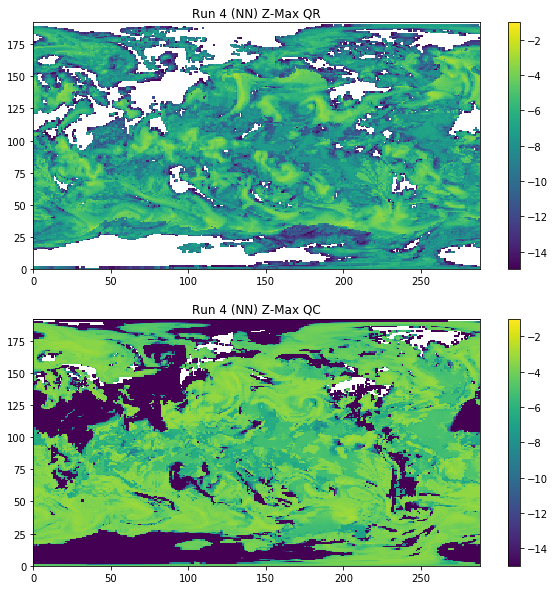

In [49]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds2["QR_TAU_in"].values[1].max(axis=0)), mask=ds2["QR_TAU_in"].values[1].max(axis=0)< 1e-15), vmin=-15, vmax=-1)
plt.title("Run 4 (NN) Z-Max QR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds2["QC_TAU_in"].values[1].max(axis=0)), mask=ds2["NC_TAU_in"].values[1].max(axis=0)< 1e-15), vmin=-15, vmax=-1)
plt.title("Run 4 (NN) Z-Max QC")
plt.colorbar()
plt.savefig("run4_run2_nr_map.png", dpi=200, bbox_inches="tight")

(array([9.21900e+03, 1.08940e+04, 1.27910e+04, 1.49610e+04, 1.72490e+04,
        1.94790e+04, 2.23160e+04, 2.44400e+04, 2.77090e+04, 3.07010e+04,
        3.79400e+04, 4.72590e+04, 6.33800e+04, 8.33210e+04, 1.08106e+05,
        1.30783e+05, 1.36294e+05, 1.31242e+05, 9.64790e+04, 1.05966e+05,
        4.11240e+04, 6.05700e+03, 8.97000e+02, 2.20000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([-18. , -17.5, -17. , -16.5, -16. , -15.5, -15. , -14.5, -14. ,
        -13.5, -13. , -12.5, -12. , -11.5, -11. , -10.5, -10. ,  -9.5,
         -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,  -5.5,  -5. ,
         -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. ,  -0.5]),
 <a list of 1 Patch objects>)

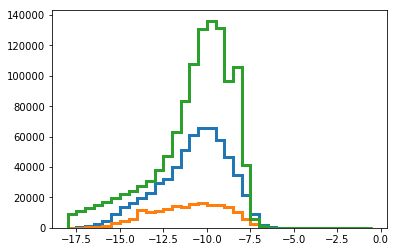

In [21]:
qrtend = ds["qrtend_TAU"].values.ravel()
qrtendm = ds["qrtend_MG2"].values.ravel()
qrtend2 = ds2["qrtend_TAU"][5].values.ravel()
#qctend = ds["qctend_TAU"].values.ravel()
plt.hist(np.log10(qrtend[qrtend > 0]), bins=np.arange(-18, 0, 0.5), histtype="step", lw=3)
plt.hist(np.log10(qrtend2[qrtend2 > 0]), bins=np.arange(-18, 0, 0.5), histtype="step", lw=3)
plt.hist(np.log10(qrtendm[qrtendm > 0]),  bins=np.arange(-18, 0, 0.5), histtype="step", lw=3)
#plt.hist(np.log10(-qctend[qctend < 0]))

#plt.gca().set_yscale("log")

In [66]:
print(np.count_nonzero(ds["qrtend_TAU"] == 0)  / ds["qrtend_TAU"].size)
print(np.count_nonzero(ds["qrtend_MG2"] == 0) / ds["qrtend_MG2"].size)

0.9239967628761574
0.8562302200882523


In [67]:
print(np.count_nonzero(ds["nrtend_TAU"] == 0) / ds["qrtend_TAU"].size)
print(np.count_nonzero(ds["nrtend_MG2"] == 0) / ds["qrtend_TAU"].size)

0.9149579083478009
0.7156812879774306


In [85]:
print(np.count_nonzero(ds["nrtend_TAU"] > 0) / ds["nrtend_TAU"].size)
print(np.count_nonzero(ds["nrtend_MG2"] > 0) / ds["nrtend_MG2"].size)

0.050562879774305555
0.1179676197193287


In [69]:
print(np.count_nonzero(ds["nrtend_TAU"] > 0) / ds["nrtend_TAU"].size)
print(np.count_nonzero(ds["nrtend_MG2"] > 0) / ds["nrtend_MG2"].size)

0.050562879774305555
0.1179676197193287


In [70]:
print(np.count_nonzero(ds["nctend_TAU"] < 0)/ ds["nrtend_TAU"].size)
print(np.count_nonzero(ds["nctend_MG2"] < 0) / ds["nrtend_TAU"].size)

0.07600323712384259
0.14478737160011573


In [76]:
print(np.count_nonzero(ds["nctend_TAU"] == 0) / ds["nrtend_TAU"].size)
print(np.count_nonzero(ds["nctend_MG2"] > -1e-20) / ds["nrtend_TAU"].size)

0.9239967628761574
0.8567646167896412


In [61]:
8174932 - 672428

7502504

In [78]:
print(np.count_nonzero(ds2["qrtend_TAU"] == 0)  / ds2["qrtend_TAU"].size)
print(np.count_nonzero(ds2["qrtend_MG2"] == 0) / ds2["qrtend_MG2"].size)

0.8662067554615162
0.8545388304157021


In [79]:
print(np.count_nonzero(ds2["nrtend_TAU"] == 0)  / ds2["qrtend_TAU"].size)
print(np.count_nonzero(ds2["nrtend_MG2"] == 0) / ds2["qrtend_MG2"].size)

0.8642034271616995
0.7091777283468365


In [82]:
print(np.count_nonzero(ds2["nrtend_TAU"] > 0)  / ds2["qrtend_TAU"].size)
print(np.count_nonzero(ds2["nrtend_MG2"] > 0) / ds2["qrtend_MG2"].size)

0.05340952932098766
0.1168294835973669


In [80]:
print(np.count_nonzero(ds2["nctend_TAU"] == 0)  / ds2["qrtend_TAU"].size)
print(np.count_nonzero(ds2["nctend_MG2"] == 0) / ds2["qrtend_MG2"].size)

0.868083925600405
0.8536202513141397
